In [1]:
import pandas as pd
import numpy as np

## 데이터셋 불러오기

*df 의 row 수 210315 개 맞는지 확인 해 주세요


In [2]:
# 코랩 mount
from google.colab import drive
drive.mount('/content/drive')

root_path = "/content/drive/MyDrive/기계학습이해/"

# 데이터 읽어오기 (고정 전처리한 데이터)
df = pd.read_csv(root_path + "Dataset/base_process.csv", encoding = "euc-kr", engine='python')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
len(df)

210315

In [4]:
predicted = pd.read_csv(root_path + "Dataset/predicted_result.csv", encoding = 'UTF8', engine='python')
predicted2 = pd.read_csv(root_path + "Dataset/accident_rate.csv", encoding = 'UTF8', engine='python')

## 파생변수 불러오기

- 파생변수 따로 할거면 이 부분 실행 안시켜도 돼요

In [5]:

# 민호님
column_age = df['연령대']
numeric_age = column_age.replace({10: 19, 20: 25, 30: 35, 40: 44, 50: 54, 60: 64, 70: 73, 80: 83, 90: 93}).to_frame().reset_index(drop=True)
df['수치형연령대'] = numeric_age


column_NCR = df['직전3년간사고건수']
numeric_NCR = column_NCR.replace({'N': 0, 'D': 1, 'C': 2, 'B': 3, 'Z': 0.15}).to_frame().reset_index(drop=True)
df['수치형직전3년간사고건수'] = numeric_NCR

# 민호님
column_carAge = df['차량경과년수']
numeric_carAge = column_carAge.replace({'신차': 0, '5년이하': 3.16, '10년이하': 7.8, '10년이상': 12.86}).to_frame().reset_index(drop=True)
df['수치형차량경과년수'] = numeric_carAge

# 민호님
column_carType = df['차종']
numeric_carType = column_carType.replace({'소형A': 998, '소형B':1500 , '중형': 1999, '대형': 2740,'다목적1종':2080, '다목적2종':2080 }).to_frame().reset_index(drop=True)
df['수치형차종'] = numeric_carType

# 민호님
column_mileage = df['마일리지약정거리']
numeric_mileage = column_mileage.replace({'미가입': 0, '3000K': 3, '5000K': 5, '7000K': 7, '10000K':9 , '12000K':10, '15000K':15}).to_frame().reset_index(drop=True)
df['수치형마일리지'] =numeric_mileage


In [6]:
# 연령대별 사고율
df['연령대사고율'] = np.where(df['연령대'] == 30, predicted['30대'],
                          np.where(df['연령대'] == 40, predicted['40대'],
                          np.where(df['연령대'] == 50, predicted['50대'],
                          np.where(df['연령대'] == 60, predicted['~64'],
                          np.where(df['연령대'] <= 20, predicted['20대'],
                          np.where(df['연령대'] >= 70, predicted['65~'], np.nan))))))

# 성별별 사고율
df['성별사고율'] = np.where(df['성별'] == 1, predicted['남성'], predicted['여성'])
df['성별TAAS'] = np.where(df['성별'] == 1, predicted['남성 TAAS'], predicted['여성 TAAS'])
# 특약별 사고율
df['특약사고율'] = np.where((df['운전자한정특별약관'] == '기명피보험자1인한정') | (df['운전자한정특별약관'] == '1인 및 지정1인'), predicted['특약 기명피보험자1인'],
                        np.where((df['운전자한정특별약관'] == '부부한정') | (df['운전자한정특별약관'] == '부부 및 지정1인'), predicted['특약부부'],
                        np.where((df['운전자한정특별약관'] == '가족한정(형제자매제외)') | (df['운전자한정특별약관'] == '가족및형제자매한정') | (df['운전자한정특별약관'] == '가족 및 지정1인'), predicted['특약 가족'],
                        np.where(df['운전자한정특별약관'] == '누구나(기본)', predicted['특약 미가입'],
                        np.where(df['운전자한정특별약관'] == '임직원한정', predicted['특약 기타'],
                                 predicted['특약부부']))))) # 부부및자녀한정이지워짐
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210315 entries, 0 to 210314
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   연령대           210315 non-null  float64
 1   성별            210315 non-null  object 
 2   국산차량여부        210315 non-null  object 
 3   직전3년간사고건수     210315 non-null  object 
 4   차량경과년수        210315 non-null  object 
 5   차종            210315 non-null  object 
 6   운전자한정특별약관     210315 non-null  object 
 7   가입경력코드        210315 non-null  float64
 8   차량가입금액        210315 non-null  object 
 9   영상기록장치특약가입    210315 non-null  object 
 10  마일리지약정거리      210315 non-null  object 
 11  사고유무          210315 non-null  int64  
 12  수치형연령대        210315 non-null  float64
 13  수치형직전3년간사고건수  210315 non-null  float64
 14  수치형차량경과년수     210315 non-null  float64
 15  수치형차종         210315 non-null  int64  
 16  수치형마일리지       210315 non-null  int64  
 17  연령대사고율        210315 non-null  float64
 18  성별사고

In [7]:
# 연령대별 사고율
df['연령대사고율2'] = np.where(df['연령대'] == 20, predicted2['20대'],
                          np.where(df['연령대'] == 30, predicted2['30대'],
                          np.where(df['연령대'] == 40, predicted2['40대'],
                          np.where(df['연령대'] == 50, predicted2['50대'],
                          np.where(df['연령대'] == 60, predicted2['60대'],
                          np.where(df['연령대'] == 70, predicted2['70대'],
                          np.where(df['연령대'] == 80, predicted2['80대'],
                          np.where(df['연령대'] >= 90, predicted2['90대'],
                          np.where(df['연령대'] <= 10, predicted2['10대'],np.nan)))))))))

df['차종전년도사고율2'] = np.where(df['차종'] == '중형', predicted2['중형'],
                            np.where(df['차종'] == '대형', predicted2['대형'],
                            np.where(df['차종'] == '소형B', predicted2['소형'],
                            np.where(df['차종'] == '다목적2종', predicted2['대형'],
                            np.where(df['차종'] == '소형A', predicted2['소형'],
                            np.where(df['차종'] == '대형', predicted2['대형'],
                            np.where(df['차종'] == '다목적1종', predicted2['대형'],np.nan)))))))

# 성별별 사고율
df['성별사고율2'] = np.where(df['성별'] == 1, predicted['남성'], predicted['여성'])

# 특약별 사고율
df['특약사고율2'] = np.where((df['운전자한정특별약관'] == '기명피보험자1인한정') | (df['운전자한정특별약관'] == '1인 및 지정1인'), predicted2['기명피보험자1인'],
                        np.where((df['운전자한정특별약관'] == '부부한정') | (df['운전자한정특별약관'] == '부부 및 지정1인'), predicted2['부부'],
                        np.where((df['운전자한정특별약관'] == '가족한정(형제자매제외)') | (df['운전자한정특별약관'] == '가족및형제자매한정') | (df['운전자한정특별약관'] == '가족 및 지정1인'), predicted2['가족'],
                        np.where(df['운전자한정특별약관'] == '누구나(기본)', predicted2['미가입'],
                        np.where(df['운전자한정특별약관'] == '임직원한정', predicted2['기타'],
                                 predicted2['부부']))))) # 부부및자녀한정이지워짐
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210315 entries, 0 to 210314
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   연령대           210315 non-null  float64
 1   성별            210315 non-null  object 
 2   국산차량여부        210315 non-null  object 
 3   직전3년간사고건수     210315 non-null  object 
 4   차량경과년수        210315 non-null  object 
 5   차종            210315 non-null  object 
 6   운전자한정특별약관     210315 non-null  object 
 7   가입경력코드        210315 non-null  float64
 8   차량가입금액        210315 non-null  object 
 9   영상기록장치특약가입    210315 non-null  object 
 10  마일리지약정거리      210315 non-null  object 
 11  사고유무          210315 non-null  int64  
 12  수치형연령대        210315 non-null  float64
 13  수치형직전3년간사고건수  210315 non-null  float64
 14  수치형차량경과년수     210315 non-null  float64
 15  수치형차종         210315 non-null  int64  
 16  수치형마일리지       210315 non-null  int64  
 17  연령대사고율        210315 non-null  float64
 18  성별사고

## One-hot, 은아님, 민호님 라벨링 컬럼 만들기


In [8]:
def make_df(df):
  # 연령대


  # 연령대 컬럼을 one-hot 인코딩으로 변환
  one_hot_age = pd.get_dummies(df['연령대'], prefix='연령대').reset_index(drop=True)

  # 은아님
  labeled_age = df['연령대'].apply(lambda x: int(str(x).replace(',', '').split('.')[0])).reset_index(drop=True)

  # 민호님
  column_age = df['연령대']
  numeric_age = column_age.replace({10: 19, 20: 25, 30: 35, 40: 44, 50: 54, 60: 64, 70: 73, 80: 83, 90: 93}).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_age = pd.concat([one_hot_age, numeric_age], axis = 1).reset_index(drop=True)

  # one_hot + 민호님
  labeled_numeric_age = pd.concat([labeled_age, numeric_age], axis = 1).reset_index(drop=True)

  ages = [one_hot_age, labeled_age, numeric_age,one_hot_numeric_age,labeled_numeric_age]


  # 직전 3년간 사고 건수

  one_hot_NCR = pd.get_dummies(df['직전3년간사고건수'], prefix='NCR').reset_index(drop=True)

  # 은아님
  # 신규 0, 무사고 1, 1회 2, 2회 3, 3회 4, 결측치 0 은 무사고로 편입
  labeled_NCR_1 = df['직전3년간사고건수'].apply(lambda x: str(x).replace('0', 'N'))
  labeled_NCR = labeled_NCR_1.apply(lambda x: int(str(x).replace('Z', '0').replace('N', '1').replace('D', '2').replace('C', '3').replace('B', '4'))).reset_index(drop=True)


  # 민호님
  column_NCR = df['직전3년간사고건수']
  numeric_NCR = column_NCR.replace({'N': 0, 'D': 1, 'C': 2, 'B': 3, 'Z': 0.15}).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_NCR = pd.concat([one_hot_NCR, numeric_NCR], axis = 1).reset_index(drop=True)

  # one_hot + 민호님
  labeled_numeric_NCR = pd.concat([labeled_NCR, numeric_NCR], axis = 1).reset_index(drop=True)

  NCRs = [one_hot_NCR, labeled_NCR, numeric_NCR, one_hot_numeric_NCR, labeled_numeric_NCR]


  ## 차량 경과년수

  one_hot_carAge = pd.get_dummies(df['차량경과년수'], prefix='차량경과년수').reset_index(drop=True)

  # 은아님
  labeled_carAge = df['차량경과년수'].apply(lambda x: int(str(x).replace('신차', '0').replace('5년이하', '1').replace('10년이하', '2').replace('10년이상', '3'))).reset_index(drop=True)


  # 민호님
  column_carAge = df['차량경과년수']
  numeric_carAge = column_carAge.replace({'신차': 0, '5년이하': 3.16, '10년이하': 7.8, '10년이상': 12.86}).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_carAge = pd.concat([one_hot_carAge, numeric_carAge], axis = 1).reset_index(drop=True)


  # one_hot + 민호님
  labeled_numeric_carAge = pd.concat([labeled_carAge, numeric_carAge], axis = 1).reset_index(drop=True)

  carAges = [one_hot_carAge, labeled_carAge, numeric_carAge, one_hot_numeric_carAge, labeled_numeric_carAge]


  # 차종
  one_hot_carType = pd.get_dummies(df['차종'], prefix='차종').reset_index(drop=True)

  # 은아님
  labeled_carType = df['차종'].apply(lambda x: int(str(x).replace('소형A', '0').replace('소형B', '1').replace('중형', '2').replace('대형', '3').replace('다목적1종','4').replace('다목적2종','5').replace('기타','6'))).reset_index(drop=True)


  # 민호님
  column_carType = df['차종']
  numeric_carType = column_carType.replace({'소형A': 998, '소형B':1500 , '중형': 1999, '대형': 2740,'다목적1종':2080, '다목적2종':2080 }).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_carType = pd.concat([one_hot_carType, numeric_carType], axis = 1).reset_index(drop=True)


  # one_hot + 민호님
  labeled_numeric_carType = pd.concat([labeled_carType, numeric_carType], axis = 1).reset_index(drop=True)


  carTypes = [one_hot_carType, labeled_carType, numeric_carType, one_hot_numeric_carType, labeled_numeric_carType]


  # 마일리지


  one_hot_mileage = pd.get_dummies(df['마일리지약정거리'], prefix='마일리지').reset_index(drop=True)


  # 은아님
  labeled_mileage_1 = df['마일리지약정거리'].apply(lambda x: str(x).replace('12000K','4').replace('15000K','5').replace('미가입','6'))
  labeled_mileage = labeled_mileage_1.apply(lambda x: int(str(x).replace('3000K', '0').replace('5000K', '1').replace('7000K', '2').replace('10000K', '3'))).reset_index(drop=True)


  # 민호님
  column_mileage = df['마일리지약정거리']
  numeric_mileage = column_mileage.replace({'미가입': 0, '3000K': 3, '5000K': 5, '7000K': 7, '10000K':9 , '12000K':10, '15000K':15}).to_frame().reset_index(drop=True)

  # one-hot + 은아님
  one_hot_numeric_mileage = pd.concat([one_hot_mileage, numeric_mileage], axis = 1).reset_index(drop=True)

  # one_hot + 민호님
  labeled_numeric_mileage = pd.concat([labeled_mileage, numeric_mileage], axis = 1).reset_index(drop=True)

  mileages = [one_hot_mileage, labeled_mileage, numeric_mileage,one_hot_numeric_mileage, labeled_numeric_mileage]


  # 가입경력

  one_hot_exp = pd.get_dummies(df['가입경력코드']).reset_index(drop=True)

  # 은아님
  labeled_exp = df['가입경력코드'].apply(lambda x: int(str(x).split('.')[0])).reset_index(drop=True)

  exps = [one_hot_exp, labeled_exp]


  # 가입금액

  one_hot_money = pd.get_dummies(df['차량가입금액']).reset_index(drop=True)

  # 은아님
  labeled_money = df['차량가입금액'].apply(lambda x : int(str(x).replace('미가입','0').replace('5천만원이하','1').replace('1억이하','2').replace('1억이상','3'))).reset_index(drop=True)

  moneys = [one_hot_money, labeled_money]

  one_hot_sex = pd.get_dummies(df['성별'], prefix='성별')
  one_hot_kor = pd.get_dummies(df['국산차량여부'], prefix='국산')
  one_hot_rule = pd.get_dummies(df['운전자한정특별약관'], prefix='약관')
  one_hot_cctv = pd.get_dummies(df['영상기록장치특약가입'], prefix='영상기록')

  combined_df = pd.concat([one_hot_sex, one_hot_kor, one_hot_rule, one_hot_cctv], axis=1).reset_index(drop=True)

  df_y = df['사고유무'].reset_index(drop=True)

  return ages, NCRs, carAges, carTypes, mileages, exps, moneys, combined_df, df_y


## 파생변수 컬럼 만들기

In [10]:
# 파생변수 수치형
def make_numeric(df):
    X1 = df[['수치형연령대']]
    X2 = df[['수치형직전3년간사고건수']]
    X3 = df[['수치형차량경과년수']]
    X4 = df[['수치형차종']]
    X5 = df[['수치형마일리지']]
    X6 = df[['수치형연령대', '수치형직전3년간사고건수']]
    X7 = df[['수치형연령대', '수치형차량경과년수']]
    X8 = df[['수치형연령대', '수치형차종']]
    X9 = df[['수치형연령대', '수치형마일리지']]
    X10 = df[['수치형직전3년간사고건수', '수치형차량경과년수']]
    X11 = df[['수치형직전3년간사고건수', '수치형차종']]
    X12 = df[['수치형직전3년간사고건수', '수치형마일리지']]
    X13 = df[['수치형차량경과년수', '수치형차종']]
    X14 = df[['수치형차량경과년수', '수치형마일리지']]
    X15 = df[['수치형차종', '수치형마일리지']]
    X16 = df[['수치형연령대', '수치형직전3년간사고건수', '수치형차량경과년수']]
    X17 = df[['수치형연령대', '수치형직전3년간사고건수', '수치형차종']]
    X18 = df[['수치형연령대', '수치형직전3년간사고건수', '수치형마일리지']]
    X19 = df[['수치형연령대', '수치형차량경과년수', '수치형차종']]
    X20 = df[['수치형연령대', '수치형차량경과년수', '수치형마일리지']]
    X21 = df[['수치형연령대', '수치형차종', '수치형마일리지']]
    X22 = df[['수치형직전3년간사고건수', '수치형차량경과년수', '수치형차종']]
    X23 = df[['수치형직전3년간사고건수', '수치형차량경과년수', '수치형마일리지']]
    X24 = df[['수치형직전3년간사고건수', '수치형차종', '수치형마일리지']]
    X25 = df[['수치형차량경과년수', '수치형차종', '수치형마일리지']]
    X26 = df[['수치형연령대', '수치형직전3년간사고건수', '수치형차량경과년수', '수치형차종']]
    X27 = df[['수치형연령대', '수치형직전3년간사고건수', '수치형차량경과년수', '수치형마일리지']]
    X28 = df[['수치형연령대', '수치형직전3년간사고건수', '수치형차종', '수치형마일리지']]
    X29 = df[['수치형연령대', '수치형차량경과년수', '수치형차종', '수치형마일리지']]
    X30 = df[['수치형직전3년간사고건수', '수치형차량경과년수', '수치형차종', '수치형마일리지']]
    X31 = df[['수치형연령대', '수치형직전3년간사고건수', '수치형차량경과년수', '수치형차종', '수치형마일리지']]
    X32 = df[[]]  # 빈 데이터프레임

    return [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X27, X28, X29, X30, X31, X32]



# 파생변수 LSTM
def make_paseng(df):
  X1 = df[['연령대사고율', '성별사고율', '특약사고율', '성별TAAS']]
  X2 = df[['연령대사고율', '성별사고율', '성별TAAS']]
  X3 = df[['연령대사고율', '특약사고율', '성별TAAS']]
  X4 = df[['성별사고율', '특약사고율', '성별TAAS']]
  X5 = df[['연령대사고율', '성별TAAS']]
  X6 = df[['성별사고율', '성별TAAS']]
  X7 = df[['특약사고율', '성별TAAS']]
  X8 = df[['성별TAAS']]
  X9 = df[['연령대사고율', '성별사고율', '특약사고율']]
  X10 = df[['연령대사고율', '성별사고율']]
  X11 = df[['연령대사고율', '특약사고율']]
  X12 = df[['성별사고율', '특약사고율']]
  X13 = df[['연령대사고율']]
  X14 = df[['성별사고율']]
  X15 = df[['특약사고율']]
  X16 = df[[]]

  return [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16]

In [11]:
# 파생변수 전년도 사고율

def make_paseng2(df):
  X1 = df[['연령대사고율2', '성별사고율2', '특약사고율2', '차종전년도사고율2']]
  X2 = df[['연령대사고율2', '성별사고율2', '특약사고율2']]
  X3 = df[['연령대사고율2', '성별사고율2', '차종전년도사고율2']]
  X4 = df[['연령대사고율2', '특약사고율2', '차종전년도사고율2']]
  X5 = df[['성별사고율2', '특약사고율2', '차종전년도사고율2']]
  X6 = df[['연령대사고율2', '성별사고율2']]
  X7 = df[['연령대사고율2', '특약사고율2']]
  X8 = df[['연령대사고율2', '차종전년도사고율2']]
  X9 = df[['성별사고율2', '특약사고율2']]
  X10 = df[['성별사고율2', '차종전년도사고율2']]
  X11 = df[['특약사고율2', '차종전년도사고율2']]
  X12 = df[['연령대사고율2']]
  X13 = df[['성별사고율2']]
  X14 = df[['특약사고율2']]
  X15 = df[['차종전년도사고율2']]
  X16 = df[[]]

  return [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16]


## 원하는 컬럼 만들기

- 파라미터 값 값 넣어주시면 됩니다
- 데이터 개수 210315 인것 확인해 주세요


원하는 컬럼만들기
- a1 ~ a7 -> 1: onehot, 2: 은아님
  -  a1: 연령대
  - a2: NCR
  - a3: 차량경과년수
  - a4: 차종
  - a5: 마일리지
  - a6: 가입 경력 코드
  - a7: 차량가입금액
- d1 -> 수치형 파생변수 (1~32)
  - 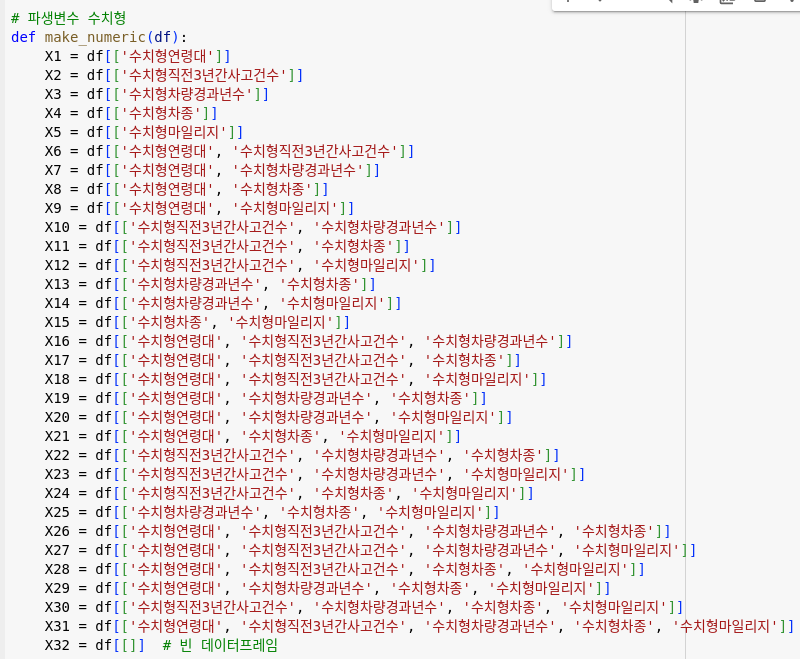
- b1 -> LSTM 파생변수 (1~16)
  - 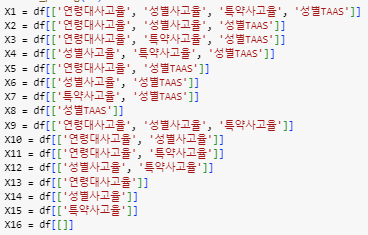

- c1 : 전년도사고율 (1~16)
  - 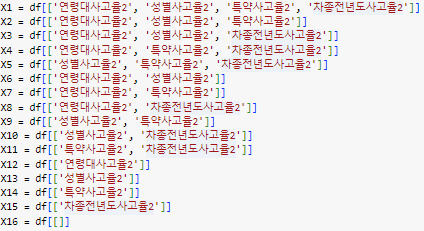

In [12]:
# 사용하고 싶은 라벨 설정

a1 = 1
a2 = 1
a3 = 1
a4 = 1
a5 = 1
a6 = 1
a7 = 1

d1 = 1

b1 = 1
c1 = 1

In [13]:
def combind_df(df_yn, a1,a2,a3,a4,a5,a6,a7, d1, b1,c1):

    ages, NCRs, carAges, carTypes, mileages, exps, moneys, combined_df, yn_y = make_df(df_yn)
    paseng_list = make_paseng(df_yn)
    paseng_list2 = make_paseng2(df_yn)
    numeric_list = make_numeric(df_yn)

    comb_df = pd.concat([combined_df, ages[a1-1], NCRs[a2-1], carAges[a3-1], carTypes[a4-1], mileages[a5-1],exps[a6-1], moneys[a7-1]], axis=1).reset_index(drop=True)

    comb_df.columns = comb_df.columns.astype(str)
    comb_df_numeric = comb_df.astype(int).reset_index(drop=True)

    paseng = paseng_list[b1-1].reset_index(drop=True)

    paseng2 = paseng_list2[c1-1].reset_index(drop=True)

    numeric = numeric_list[d1-1].reset_index(drop=True)

    comb_df_real = pd.concat([comb_df_numeric, numeric, paseng, paseng2, yn_y], axis=1).reset_index(drop=True)

    return comb_df_real

In [14]:
new_df= combind_df(df, a1,a2,a3,a4,a5,a6,a7, d1, b1,c1)
new_df

,성별_남성,성별_여성,국산_국산,국산_외산,약관_ 부부 및 자녀한정,약관_1인 및 지정1인,약관_가족 및 지정1인,약관_가족및형제자매한정,약관_가족한정(형제자매제외),약관_기명피보험자1인한정,...,수치형연령대,연령대사고율,성별사고율,특약사고율,성별TAAS,연령대사고율2,성별사고율2,특약사고율2,차종전년도사고율2,사고유무
0,0,1,1,0,0,0,0,0,1,0,...,19.0,0.005510,0.025433,0.087615,0.003425,1.21,0.025433,0.16,1.35,1
1,0,1,1,0,0,0,0,0,0,0,...,19.0,0.005510,0.025433,0.055043,0.003425,1.21,0.025433,0.12,1.50,1
2,0,1,1,0,0,0,0,0,1,0,...,19.0,0.005510,0.025433,0.087615,0.003425,1.21,0.025433,0.16,1.35,0
3,0,1,1,0,0,0,0,0,1,0,...,19.0,0.005510,0.025433,0.087615,0.003425,1.21,0.025433,0.16,1.09,0
4,0,1,1,0,0,0,0,0,1,0,...,19.0,0.005510,0.025433,0.087615,0.003425,1.21,0.025433,0.16,1.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210310,1,0,1,0,0,0,0,0,0,1,...,44.0,0.033873,0.025433,0.045383,0.003425,0.48,0.025433,0.12,1.09,0
210311,1,0,1,0,0,0,0,0,0,0,...,44.0,0.033873,0.025433,0.055043,0.003425,0.48,0.025433,0.12,1.35,0
210312,1,0,1,0,1,0,0,0,0,0,...,44.0,0.033873,0.025433,0.043751,0.003425,0.48,0.025433,0.11,1.09,0
210313,1,0,1,0,0,0,0,0,0,0,...,44.0,0.033873,0.025433,0.055043,0.003425,0.48,0.025433,0.12,1.09,0


## test case 만들기

- trainset 데이터 갯수:  105157
- testset 데이터 갯수:  105158

In [15]:
rows = len(new_df)

# 행 개수의 절반을 계산하고 정수로 변환
half_rows = rows // 2

# 데이터프레임을 절반으로 나누기
train_df = new_df.iloc[:half_rows]
test_df = new_df.iloc[half_rows:]

print("trainset 데이터 갯수: ",len(train_df)) # 105157개 확인
print("testset 데이터 갯수: ", len(test_df)) #105158개 확인

trainset 데이터 갯수:  105157
testset 데이터 갯수:  105158


In [16]:
# y값 비율 잘 섞였는지 확인 -> 필요한가? 일단 비율은 비슷함
print("========train set y값 비율==============")
print(train_df['사고유무'].value_counts())
print("========test set y값 비율==============")
print(test_df['사고유무'].value_counts())

========train set y값 비율==============
사고유무
0    87797
1    17360
Name: count, dtype: int64
========test set y값 비율==============
사고유무
0    87254
1    17904
Name: count, dtype: int64


In [17]:
# df_yn = train_df.sample(n=20000) # train set 은 걍 데이터 뽑으면 됩니다

# train X, y 데이터셋 만들기
# X_train= combind_df(train_df, a1,a2,a3,a4,a5,a6,a7, d1, b1,c1)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

X_train = train_df.drop(columns=['사고유무'])
y_train = train_df['사고유무']

In [18]:
test_dfs = []
for i in range(100):
    # 각 반복마다 다른 랜덤 시드 설정 0~99
    np.random.seed(i)

    # 데이터프레임에서 임의의 10000개 행 추출
    sample_df = test_df.sample(n=10000)

    # 결과 확인
    test_dfs.append(sample_df)

## 학습

In [19]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score

def evaluate_lgbm_model(X_train, X_test, y_train):
    """
    LightGBM 모델을 학습하고, 정확도, 정밀도, 재현율을 반환하는 함수

    Parameters:
    X_train: 훈련 세트 특징 데이터 (numpy 배열 또는 pandas DataFrame)
    X_test: 테스트 세트 특징 데이터 (numpy 배열 또는 pandas DataFrame)
    y_train: 훈련 세트 타겟 레이블 (numpy 배열 또는 pandas Series)
    y_test: 테스트 세트 타겟 레이블 (numpy 배열 또는 pandas Series)
    num_boost_round: 부스팅 반복 횟수 (기본값 100)
    early_stopping_rounds: 조기 종료 반복 횟수 (기본값 10)

    Returns:
    accuracy: 정확도
    precision: 정밀도
    recall: 재현율
    """

    # 모델 훈련
    lgbm = lgb.LGBMClassifier(
    objective='binary',
    num_leaves=51,
    learning_rate=0.05,
    n_estimators=200
    )


    # 학습
    lgbm.fit(X_train, y_train)


    # 예측 수행
    y_pred = lgbm.predict(X_test)
    y_proba = lgbm.predict_proba(X_test)[:,1].reshape(-1,1)


    # 성능 평가
    # accuracy = accuracy_score(y_test, y_pred)
    # precision = precision_score(y_test, y_pred)
    # recall = recall_score(y_test, y_pred)


    # 최적 threshold 값 & 그 때의 FPR 출력
    # fper, tper, thresholds = roc_curve(y_test, y_proba)  # thresholds 별 fpr tpr 계산
    # optimal_idx = np.argmax(tper - fper)                 # fpr, tpr 간 차이가 가장 클 때의 index 저장
    # optimal_fpr = fper[optimal_idx]                      # 해당 index에 위치한 fpr값 저장
    # optimal_threshold = thresholds[optimal_idx]

    optimal_threshold = 0.18043346232747426

    # 최적 threshold로 진행할 때의 평가지표
    y_optpred = (y_proba > optimal_threshold).astype(int)
    # accuracy = accuracy_score(y_test, y_optpred)
    # precision = precision_score(y_test, y_optpred)
    # recall = recall_score(y_test, y_optpred)
    # f1 = f1_score(y_test, y_optpred, average='weighted')




    print(optimal_threshold)
    # print(accuracy, precision, recall)

    return y_proba, y_pred, y_optpred, optimal_threshold

In [22]:

from imblearn.over_sampling import SMOTE
for i in range(100):
    # train set에서 1000개의 데이터를 랜덤으로 추출합니다.
    random_indices = np.random.choice(len(train_df), size=20000, replace=False)
    X_train_subset = X_train.loc[random_indices]
    y_train_subset = y_train.loc[random_indices]


    # SMOTE를 이용하여 증강
    smote = SMOTE(sampling_strategy='auto')  # 'auto'는 소수 클래스의 샘플 수를 맞춥니다.
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_subset, y_train_subset)



    # 인덱스 초기화
    X_train_resampled.reset_index(drop=True, inplace=True)
    y_train_resampled.reset_index(drop=True, inplace=True)


    X_test = test_dfs[i].drop(columns=['사고유무'])
    y_test = test_dfs[i]['사고유무']


    y_proba, y_pred, y_optpred, optimal_threshold = evaluate_lgbm_model(X_train_resampled, X_test, y_train_resampled)


    # 데이터프레임 생성
    y_proba2 = y_proba.reshape(-1)
    y_optpred2 = y_optpred.reshape(-1)


    df = pd.DataFrame({
        'y_proba': y_proba2,
        'y_pred': y_pred,
        'y_optpred': y_optpred2
    })

    # CSV 파일로 저장
    df.to_csv(root_path + f'result/new/output{i}.csv', index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16727, number of negative: 16727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 33454, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
0.18043346232747426
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16628, number of negative: 16628
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tot

KeyboardInterrupt: 